In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
heart = pd.read_csv('Data/heart.csv')

In [3]:
#removing outlier
heart = heart.loc[
    (heart['chol'] <= 500)
]

# Exploring the Data
## Univariate
**How many variables do I have?**

This data set has many variables that are used to calculate and determine the 'Chest Pain' level for several patients. Some variables include: 

* resting blood pressure
* fasting blood sugar
* maximum heart rate achieved
* exercise induced angina
* sex
* ETC.

**How many datapoints?**

THe dataset is from a medical study in Cleveland, where they had 303 patients tested and measured for all 14 variables. Totaling a 4,242 datapoints

**Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).**

Continuous:
* Age
* resting blood pressure (trestbps)
* serum cholestoral (chol)
* maximum heart rate achieved (thalach)
* ST depression induced by exercise relative to rest (oldpeak)

Categorical:
* Sex
* Chest Pain Type (cp)
* fasting blood sugar > 120 mg/dl (fbs)
* resting electrocardiographic (restecg)
* exercise induced angina (exang)
* the slope of the peak exercise ST segment (slope)
* number of major vessels (0-3) colored by flourosopy (ca)
* 3 = normal; 6 = fixed defect; 7 = reversable defect (thal)
* target

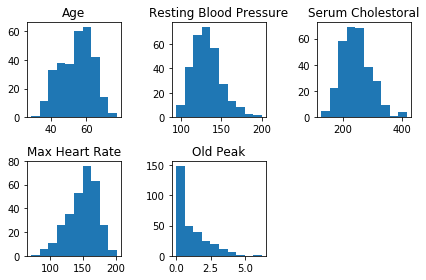

In [4]:
fig = plt.figure()

fig.add_subplot(231)
plt.hist(heart['age'].dropna())
plt.title('Age')

fig.add_subplot(232)
plt.hist(heart['trestbps'].dropna())
plt.title('Resting Blood Pressure')

fig.add_subplot(233)
plt.hist(heart['chol'].dropna())
plt.title('Serum Cholestoral')

fig.add_subplot(234)
plt.hist(heart['thalach'].dropna())
plt.title('Max Heart Rate')

fig.add_subplot(235)
plt.hist(heart['oldpeak'].dropna())
plt.title('Old Peak')

plt.tight_layout()
plt.show()

**Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?**

Age seems to have a pretty normal distribution going on. Resting Blood Pressure is borderline normal and gamma. While Max Heart Rate is same borderline normal and beta. Old Peak is log normal. While Serum Cholestoral is normal but has outliers. 



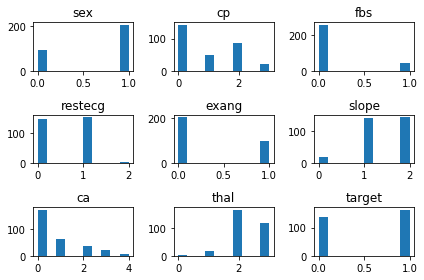

In [5]:
fig = plt.figure()

fig.add_subplot(331)
plt.hist(heart['sex'].dropna())
plt.title('sex')

fig.add_subplot(332)
plt.hist(heart['cp'].dropna())
plt.title('cp')

fig.add_subplot(333)
plt.hist(heart['fbs'].dropna())
plt.title('fbs')

fig.add_subplot(334)
plt.hist(heart['restecg'].dropna())
plt.title('restecg')

fig.add_subplot(335)
plt.hist(heart['exang'].dropna())
plt.title('exang')

fig.add_subplot(336)
plt.hist(heart['slope'].dropna())
plt.title('slope')

fig.add_subplot(337)
plt.hist(heart['ca'].dropna())
plt.title('ca')

fig.add_subplot(338)
plt.hist(heart['thal'].dropna())
plt.title('thal')

fig.add_subplot(339)
plt.hist(heart['target'].dropna())
plt.title('target')

plt.tight_layout()
plt.show()

In [6]:
heart_male = heart.loc[
    (heart['sex'] == 1),
    ['age', 'target', 'thalach', 'cp', 'oldpeak', 'exang', 'fbs', 'restecg', 'slope', 'ca', 'thal', 'trestbps', 'chol']
]
heart_female = heart.loc[
    (heart['sex'] == 0),
    ['age', 'exang', 'trestbps', 'oldpeak', 'target', 'fbs', 'restecg', 'slope', 'ca', 'thal', 'cp', 'chol', 'thalach']
]

## Bivariate

               age    target   thalach        cp   oldpeak     exang  \
age       1.000000 -0.290993 -0.408594 -0.094101  0.234677  0.152930   
target   -0.290993  1.000000  0.485584  0.407136 -0.393169 -0.393720   
thalach  -0.408594  0.485584  1.000000  0.352823 -0.376667 -0.460471   
cp       -0.094101  0.407136  0.352823  1.000000 -0.097881 -0.376453   
oldpeak   0.234677 -0.393169 -0.376667 -0.097881  1.000000  0.327622   
exang     0.152930 -0.393720 -0.460471 -0.376453  0.327622  1.000000   
fbs       0.128019  0.057675  0.046749  0.127807 -0.042910 -0.034822   
restecg  -0.181487  0.168234  0.088643  0.027833 -0.032553 -0.099220   
slope    -0.223558  0.311255  0.407575  0.054142 -0.572012 -0.251663   
ca        0.253648 -0.339703 -0.229904 -0.147816  0.125059  0.125998   
thal      0.077043 -0.255058 -0.080715 -0.127702  0.144134  0.168907   
trestbps  0.254196 -0.065489 -0.024399  0.144803  0.105156 -0.035431   
chol      0.158983 -0.175665 -0.049573 -0.110775  0.050238  0.10

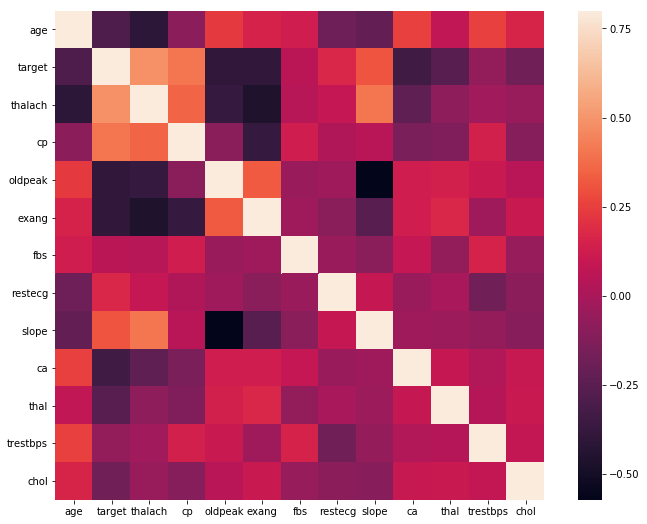

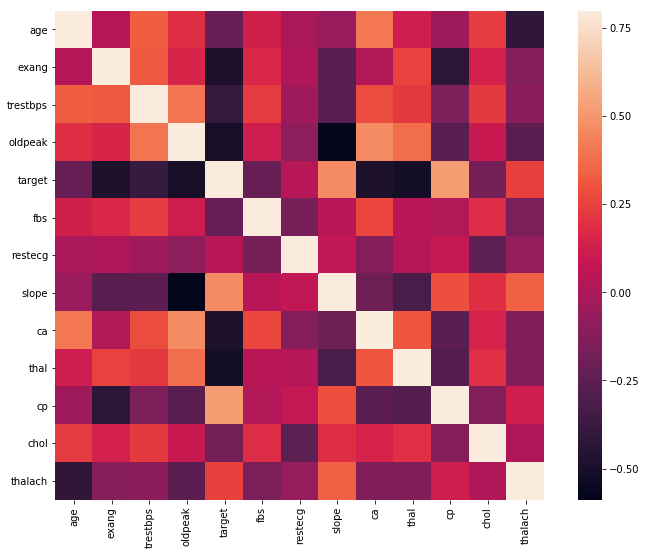

In [7]:
#Male Correlation matrix & Plot
corrmat_male = heart_male.corr()
print(corrmat_male)

#female Correlation matrix & Plot
corrmat_female = heart_female.corr()
print(corrmat_female)

#male Plot
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat_male, vmax=.8, square=True)
plt.show()

#female plot
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat_female, vmax=.8, square=True)
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


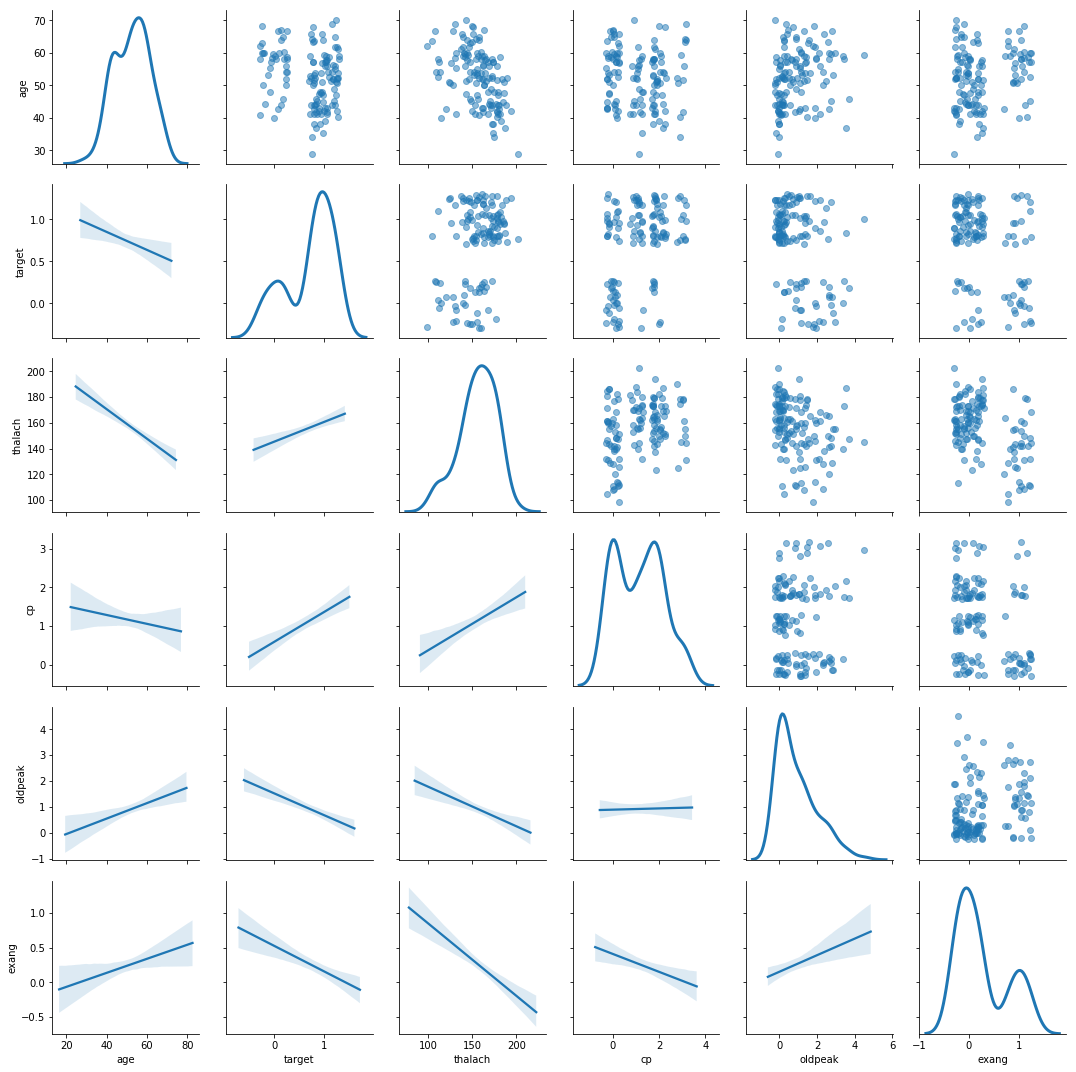

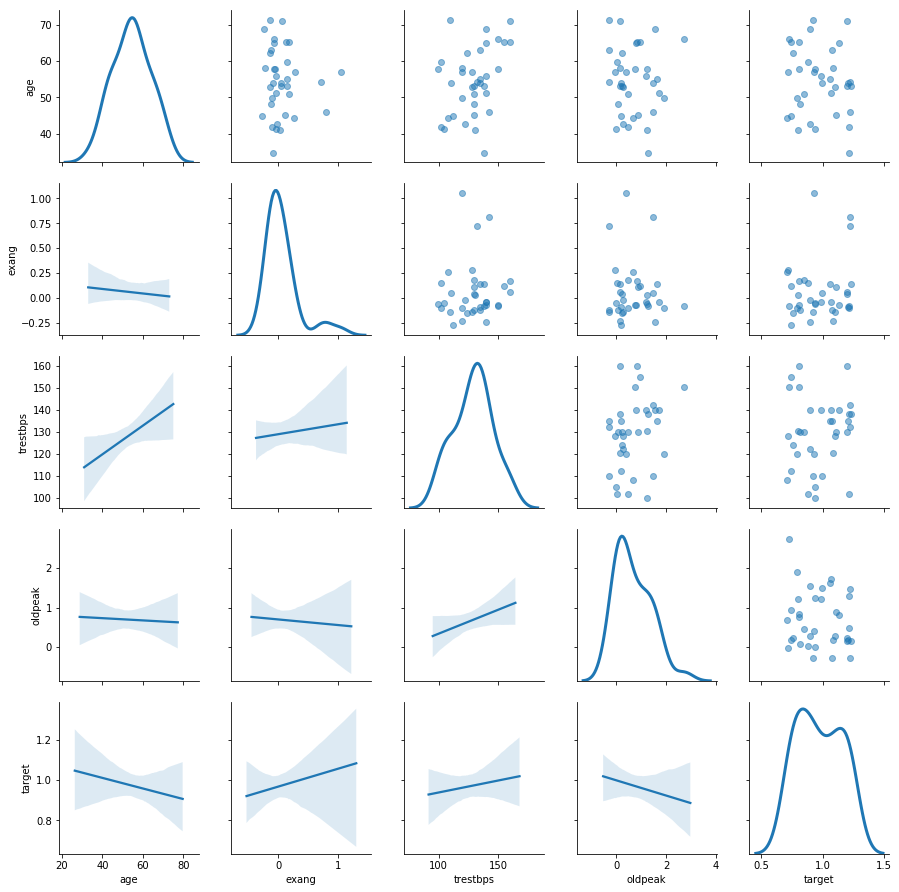

In [8]:
heart_jittered = heart_male.loc[:, 'age':'exang'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(heart_jittered.shape)),
    columns=heart_jittered.columns
)
# Combine the data and the noise.
heart_jittered = heart_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(heart_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

heart_jittered0 = heart_female.loc[:, 'age':'target'].dropna()
# Making the random noise.
jitter0 = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(heart_jittered0.shape)),
    columns=heart_jittered0.columns
)
# Combine the data and the noise.
heart_jittered0 = heart_jittered0.add(jitter0)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(heart_jittered0.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [9]:
male_exp = heart.loc[
    (heart['sex'] == 1),
    ['age', 'thalach', 'cp', 'oldpeak', 'exang', 'target']
]

print(male_exp.groupby('target').describe())

for col in male_exp.loc[:,'age':'exang'].columns:
    print(col)
    print(stats.ttest_ind(
        male_exp[male_exp['target'] == 0][col].dropna(),
        male_exp[male_exp['target'] == 1][col].dropna()
    ))

          age                                                        cp  \
        count       mean       std   min   25%   50%   75%   max  count   
target                                                                    
0       114.0  56.087719  8.385155  35.0  51.0  57.5  61.0  77.0  114.0   
1        93.0  50.903226  8.682897  29.0  44.0  52.0  57.0  70.0   93.0   

                  ...   oldpeak      thalach                                \
            mean  ...       75%  max   count        mean        std    min   
target            ...                                                        
0       0.543860  ...       2.4  5.6   114.0  138.403509  23.083043   71.0   
1       1.408602  ...       1.0  4.2    93.0  161.903226  18.492104  105.0   

                                    
          25%    50%    75%    max  
target                              
0       125.0  141.0  156.0  195.0  
1       150.0  163.0  175.0  202.0  

[2 rows x 40 columns]
age
Ttest_indResult(stati

In [10]:
female_exp = heart.loc[
    (heart['sex'] == 0),
    ['age', 'exang', 'trestbps', 'oldpeak', 'target']
]

print(female_exp.groupby('target').describe())

for col in female_exp.loc[:,'age':'oldpeak'].columns:
    print(col)
    print(stats.ttest_ind(
        female_exp[female_exp['target'] == 0][col].dropna(),
        female_exp[female_exp['target'] == 1][col].dropna()
    ))

         age                                                      exang  \
       count       mean        std   min    25%   50%   75%   max count   
target                                                                    
0       24.0  59.041667   4.964913  43.0  56.75  60.5  62.0  66.0  24.0   
1       71.0  54.380282  10.229322  34.0  46.00  54.0  63.0  76.0  71.0   

                  ...   oldpeak      trestbps                                \
            mean  ...       75%  max    count        mean        std    min   
target            ...                                                         
0       0.583333  ...      2.85  6.2     24.0  146.125000  21.436078  108.0   
1       0.112676  ...      1.00  2.6     71.0  128.929577  16.572200   94.0   

                                    
          25%    50%    75%    max  
target                              
0       130.0  140.0  152.5  200.0  
1       120.0  130.0  140.0  180.0  

[2 rows x 32 columns]
age
Ttest_indResult(

## Analysis 

Looking at the results of the univariate and bivariate analysis is seems that the data has point of correlation and noticeable bias as well.  

The known bias in the data has to do with gender. We can see how the data population is male centric with 174 males and 84 females in the data set. Males outnumber females by more than double the number of patients. The collection of the data is not specified, but this does play into the notion that males are more likely to be diagnosed with heart desease than women. To avoid the gender bias in the data we will separate the data between male and females and analyze the data separately. 

Since we are looking at the genders separately, there are certain variables that need to keep constant across the anlysis. Those variables are age, and target. These two provide valuable insight into the dataset and very useful in our analysis. We will be doing a dummy variable with age (55+). While the target variable is signficiant in helping in finding the significant variable(s) that show the strongest signs of heart disease (as target tells us whether a patient is at risk for heart disease or not). 

For moving onto the data exploration, I have decided to move along with the following variables in the data set. 

**Male Variables:**
Continuous:
* Age
* maximum heart rate achieved (thalach)
* Short tem depression induced by exercise relative to rest (oldpeak)

Categorical:
* exercise induced angina (exang)
* patient at risk for heart disease (target)

**Female Variable:**
Continuous:
* Age
* resting blood pressure (trestbps)
* Short term depression induced by exercise relative to rest (oldpeak)

Categorical:
* exercise induced angina (exang)
* patient at risk for heart disease (target)

In [12]:
features = pd.DataFrame()

In [13]:
features['fifty'] = np.where(heart['age']>=50, 1, 0)
heart['fifty'] = np.where(heart['age']>=50, 1, 0)
male = heart.loc[
    (heart['sex'] == 1),
    ['age', 'thalach', 'trestbps', 'oldpeak', 'exang', 'target', 
     'fifty']]
female = heart.loc[
    (heart['sex'] == 0),
    ['age', 'thalach', 'trestbps', 'oldpeak', 'exang', 'target', 
     'fifty']]

In [14]:
print(male['age'].groupby(male['fifty']).describe())
print(female['age'].groupby(female['fifty']).describe())

       count       mean       std   min   25%   50%   75%   max
fifty                                                          
0       64.0  42.937500  4.124549  29.0  41.0  43.5  46.0  49.0
1      143.0  58.601399  5.527320  50.0  54.0  58.0  62.0  77.0
       count       mean       std   min   25%   50%    75%   max
fifty                                                           
0       24.0  42.708333  3.994335  34.0  41.0  43.0  45.25  49.0
1       71.0  59.901408  6.108904  50.0  55.0  60.0  64.00  76.0


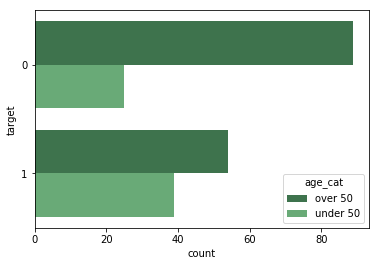

age_cat  over 50  under 50
target                    
0             89        25
1             54        39
Power_divergenceResult(statistic=43.8792270531401, pvalue=1.601016689138042e-09)


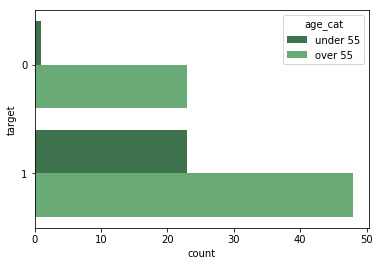

age_cat  over 55  under 55
target                    
0             23         1
1             48        23
Power_divergenceResult(statistic=46.6, pvalue=4.2277395162811e-10)


In [15]:
male_heart2cat = male.loc[
    (male['target'] != 2),
    ['fifty','target']
]

# Create a text variable so that output is easier to interpret.
male_heart2cat['age_cat'] = None
male_heart2cat.loc[male_heart2cat['fifty'] == 0, 'age_cat'] = 'under 50'
male_heart2cat.loc[male_heart2cat['fifty'] == 1, 'age_cat'] = 'over 50'

female_heart2cat = female.loc[
    (female['target'] != 2),
    ['fifty','target']
]

# Create a text variable so that output is easier to interpret.
female_heart2cat['age_cat'] = None
female_heart2cat.loc[female_heart2cat['fifty'] == 0, 'age_cat'] = 'under 55'
female_heart2cat.loc[female_heart2cat['fifty'] == 1, 'age_cat'] = 'over 55'

# Plot counts for each combination of levels.
sns.countplot(y="target", hue="age_cat", data=male_heart2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(male_heart2cat['target'], male_heart2cat['age_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

# Plot counts for each combination of levels.
sns.countplot(y="target", hue="age_cat", data=female_heart2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(female_heart2cat['target'], female_heart2cat['age_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

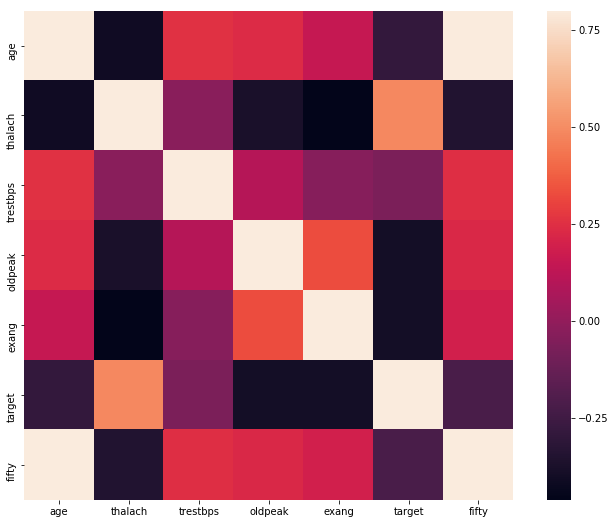

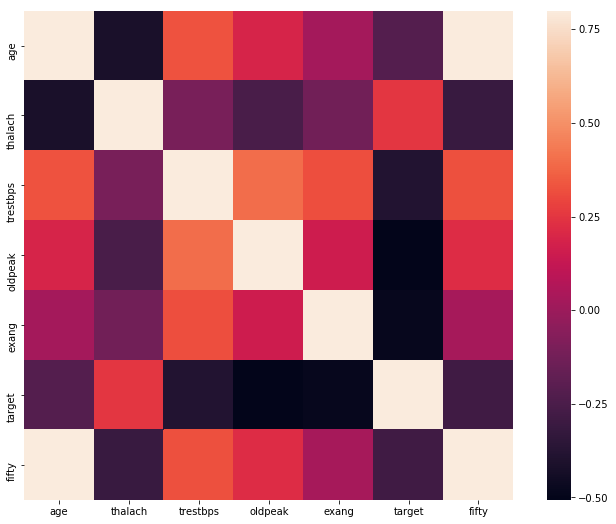

In [16]:
corrmat = male.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

corrmat = female.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [17]:
means = heart[['oldpeak','trestbps']].mean(axis=0)
stds = heart[['oldpeak','trestbps']].std(axis=0)
features['oldpeak_trestbps'] = ((heart[['oldpeak','trestbps']] - means) / stds).mean(axis=1)

In [18]:
plotdf = heart.loc[:, ['oldpeak', 'trestbps']]
plotdf['oldpeak_trestbps'] = features['oldpeak_trestbps'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                   oldpeak  trestbps  oldpeak_trestbps
oldpeak           1.000000  0.195103          0.772665
trestbps          0.195103  1.000000          0.773349
oldpeak_trestbps  0.772665  0.773349          1.000000


In [19]:
means = heart[['thalach','trestbps']].mean(axis=0)
stds = heart[['thalach','trestbps']].std(axis=0)
features['thalach_trestbps'] = ((heart[['thalach','trestbps']] - means) / stds).mean(axis=1)

In [20]:
plotdf = heart.loc[:, ['thalach', 'trestbps']]
plotdf['thalach_trestbps'] = features['thalach_trestbps'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                   thalach  trestbps  thalach_trestbps
thalach           1.000000 -0.045357          0.690268
trestbps         -0.045357  1.000000          0.691684
thalach_trestbps  0.690268  0.691684          1.000000


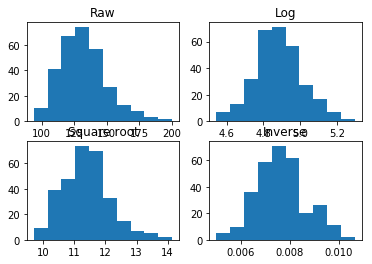

In [21]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(heart['trestbps'].dropna().values)
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(heart['trestbps'].dropna().values))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(heart['trestbps'].dropna().values))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/heart['trestbps'].dropna().values)
plt.title('Inverse')
plt.show()

In [22]:
features['trestbps_log'] = np.log(heart['trestbps'])

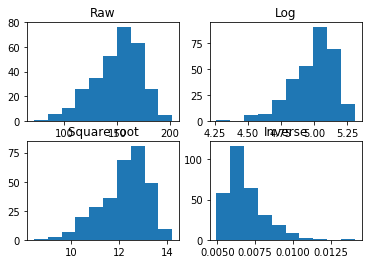

In [23]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(heart['thalach'].dropna().values)
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(heart['thalach'].dropna().values))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(heart['thalach'].dropna().values))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/heart['thalach'].dropna().values)
plt.title('Inverse')
plt.show()

In [24]:
features['thalach_sqrt'] = np.sqrt(heart['thalach'])


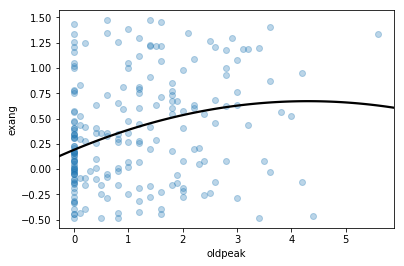

In [25]:
sns.regplot(
    male['oldpeak'],
    y=male['exang'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [26]:
features['exang_sq'] = heart['exang'] * heart['exang']


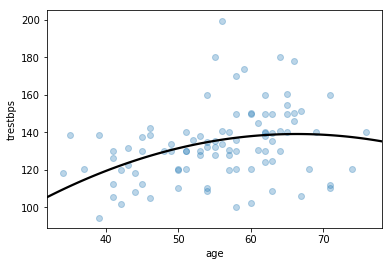

In [27]:
sns.regplot(
    female['age'],
    y=female['trestbps'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [28]:
features['trestbps_sq'] = heart['trestbps'] * heart['trestbps']

In [29]:
features['heart_risk'] = np.where(heart['target'] == 1, 1, 0)

features['fifty_with_heart_risk'] = features['fifty'] * features['heart_risk']

In [30]:
features = features.drop(['heart_risk', 'fifty_with_heart_risk'], axis=1)

In [31]:
features['target'] = heart['target']

In [32]:
features

,fifty,oldpeak_trestbps,thalach_trestbps,trestbps_log,thalach_sqrt,exang_sq,trestbps_sq,target
0,1,0.922595,0.388161,4.976734,12.247449,0.0,21025.0,1.0
1,0,1.011132,0.767206,4.867534,13.674794,0.0,16900.0,1.0
2,0,0.107946,0.440200,4.867534,13.114877,0.0,16900.0,1.0
3,1,-0.435153,0.285956,4.787492,13.341664,0.0,14400.0,1.0
4,1,-0.521170,-0.041049,4.787492,12.767145,1.0,14400.0,1.0
5,1,-0.037096,0.202038,4.941642,12.165525,0.0,19600.0,1.0
6,1,0.349984,0.311039,4.941642,12.369317,0.0,19600.0,1.0
7,0,-0.779223,0.176954,4.787492,13.152946,0.0,14400.0,1.0
8,1,0.918061,1.419391,5.147494,12.727922,0.0,29584.0,1.0
9,1,0.764057,1.053893,5.010635,13.190906,0.0,22500.0,1.0


# Feature Selection

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Covariance Matrix:
 [[ 1.00333333  0.123142   -0.11244821  0.06064433 -0.21362036  0.13950696
   0.06756722 -0.20681035]
 [ 0.123142    1.00333333  0.37995455  0.77212437 -0.2465649   0.22940579
   0.7728669  -0.37674295]
 [-0.11244821  0.37995455  1.00333333  0.6927432   0.69213647 -0.22573742
   0.68907049  0.2054421 ]
 [ 0.06064433  0.77212437  0.6927432   1.00333333 -0.04176514  0.05823164
   0.98464057 -0.14070133]
 [-0.21362036 -0.2465649   0.69213647 -0.04176514  1.00333333 -0.37171375
  -0.04608381  0.42441801]
 [ 0.13950696  0.22940579 -0.22573742  0.05823164 -0.37171375  1.00333333
   0.07298173 -0.44081803]
 [ 0.06756722  0.7728669   0.68907049  0.98464057 -0.04608381  0.07298173
   1.00333333 -0.14602762]
 [-0.20681035 -0.37674295  0.2054421  -0.14070133  0.42441801 -0.44081803
  -0.14602762  1.00333333]]


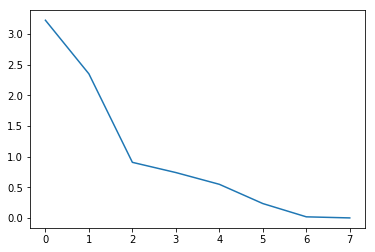

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


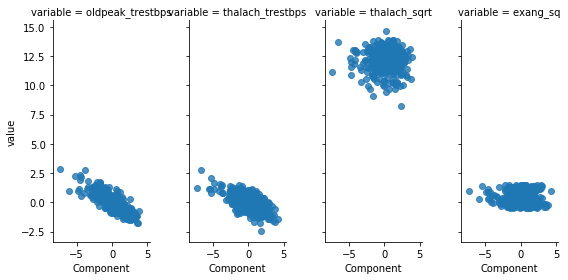

In [33]:

features = features.dropna()
X = StandardScaler().fit_transform(features)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

P = eig_vec_cov[:, 0]
Y = P.T.dot(Xt)

data_to_plot = features[['oldpeak_trestbps', 'thalach_trestbps', 'thalach_sqrt', 'exang_sq']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", height=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [34]:

# load data
features = features.dropna()
array = features.values
X = array[:,0:7]
Y = array[:,7]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features:") 
print(fit.n_features_)
print("Selected Features:")
print(fit.support_)
print("Feature Ranking:")
print(fit.ranking_)

Num Features:
3
Selected Features:
[False  True  True False False  True False]
Feature Ranking:
[2 1 1 4 3 1 5]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [35]:

# load data
features = features.dropna()
array = features.values
X = array[:,0:7]
Y = array[:,7]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.03652791 0.22747264 0.17219327 0.09994113 0.18675479 0.15546665
 0.12164362]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
heart['oldpeak_trestbps'] = features['oldpeak_trestbps']
heart['thalach_trestbps'] = features['thalach_trestbps']
heart['thalach_sqrt'] = features['thalach_sqrt']
heart['exang_sq'] = features['exang_sq']

male_feat = heart.loc[
    (heart['sex'] == 1),
    ['oldpeak_trestbps', 'thalach_trestbps', 'thalach_sqrt', 'exang_sq',
     'target']]
female_feat = heart.loc[
    (heart['sex'] == 0),
    ['oldpeak_trestbps', 'thalach_trestbps', 'thalach_sqrt', 'exang_sq', 
     'target']]

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


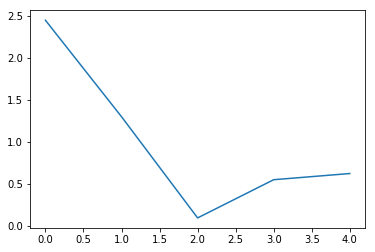

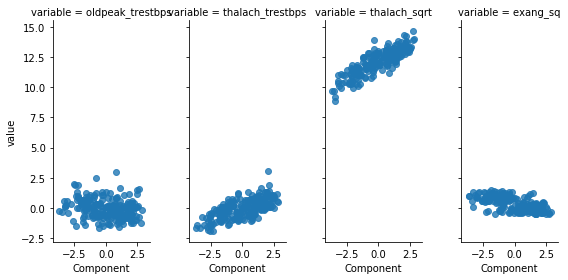

In [37]:
male_feat = male_feat.dropna()
X_male = StandardScaler().fit_transform(male_feat)
Xt_male = X_male.T
Cx_male = np.cov(Xt_male)

eig_val_cov_male, eig_vec_cov_male = np.linalg.eig(Cx_male)

plt.plot(eig_val_cov_male)
plt.show()

P_male = eig_vec_cov_male[:, 0]
Y_male = P_male.T.dot(Xt_male)

data_to_plot_male = male_feat[['oldpeak_trestbps', 'thalach_trestbps', 'thalach_sqrt', 'exang_sq']]
data_to_plot_male['Component'] = Y_male
data_to_plot_male = pd.melt(data_to_plot_male, id_vars='Component')

g = sns.FacetGrid(data_to_plot_male, col="variable", height=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [38]:
male_feat = male_feat.dropna()
array = male_feat.values
X = array[:,0:4]
Y = array[:,4]

model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features:") 
print(fit.n_features_)
print("Selected Features:")
print(fit.support_)
print("Feature Ranking:")
print(fit.ranking_)

male_feat = male_feat.dropna()
array = male_feat.values
X = array[:,0:4]
Y = array[:,4]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

Num Features:
2
Selected Features:
[ True  True False False]
Feature Ranking:
[1 1 3 2]
[0.27973252 0.31013196 0.27787949 0.13225603]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
male = heart.loc[
    (heart['sex'] == 1),
    ['age', 'thalach', 'trestbps', 'oldpeak', 'exang', 
     'oldpeak_trestbps', 'thalach_trestbps',
     'target']]

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


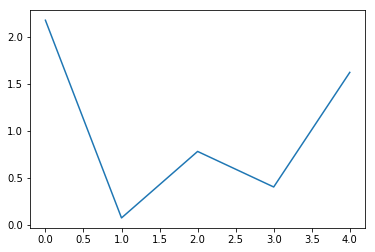

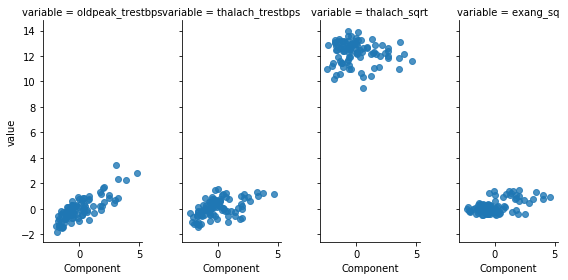

In [40]:
female_feat = female_feat.dropna()
X_female = StandardScaler().fit_transform(female_feat)
Xt_female = X_female.T
Cx_female = np.cov(Xt_female)

eig_val_cov_female, eig_vec_cov_female = np.linalg.eig(Cx_female)

plt.plot(eig_val_cov_female)
plt.show()

P_female = eig_vec_cov_female[:, 0]
Y_female = P_female.T.dot(Xt_female)

data_to_plot_female = female_feat[['oldpeak_trestbps', 'thalach_trestbps', 'thalach_sqrt', 'exang_sq']]
data_to_plot_female['Component'] = Y_female
data_to_plot_female = pd.melt(data_to_plot_female, id_vars='Component')

g = sns.FacetGrid(data_to_plot_female, col="variable", height=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [41]:
female_feat = female_feat.dropna()
array = female_feat.values
X = array[:,0:4]
Y = array[:,4]

model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features:") 
print(fit.n_features_)
print("Selected Features:")
print(fit.support_)
print("Feature Ranking:")
print(fit.ranking_)

female_feat = female_feat.dropna()
array = female_feat.values
X = array[:,0:4]
Y = array[:,4]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

Num Features:
2
Selected Features:
[ True False False  True]
Feature Ranking:
[1 2 3 1]
[0.34074461 0.18197178 0.23332024 0.24396337]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
female = heart.loc[
    (heart['sex'] == 1),
    ['age', 'thalach', 'trestbps', 'oldpeak', 'exang', 
     'oldpeak_trestbps', 'thalach_sq',
     'target']]

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# Concluding Analysis
After further analysis and feature selection, the final variables and features are the following:
**Male Dataset**
Continuous:
* Age
* resting blood pressure (trestbps)
* maximum heart rate achieved (thalach)
* ST depression induced by exercise relative to rest (oldpeak)

Categorical:
* exercise induced angina (exang)
* target

Features:
* oldpeak /* trestbps (oldpeak_trestbps)
* thalach /* trestbps (thalach_trestbps)

**Female Dataset**
Continuous:
* Age
* resting blood pressure (trestbps)
* maximum heart rate achieved (thalach)
* ST depression induced by exercise relative to rest (oldpeak)

Categorical:
* exercise induced angina (exang)
* target

Features:
* oldpeak /* trestbps (oldpeak_trestbps)
* thalach^2 (thalach_sq)